# Discretization

Data discretization is the process of converting `continuous data` into `discrete intervals or categories`. It's also known as binning, and is often used in data mining, machine learning, and data science. 

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [4]:
# impute missing values
df['age'] = df['age'].fillna(df['age'].median())

In [15]:
# discretization of age
est = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='uniform')
df['age_bin'] = est.fit_transform(df[['age']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0


<Axes: xlabel='age', ylabel='Count'>

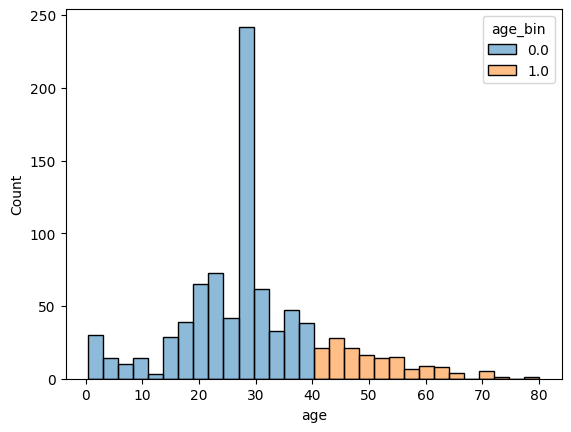

In [16]:
sns.histplot(df, x='age', hue='age_bin')

<Axes: xlabel='age', ylabel='Count'>

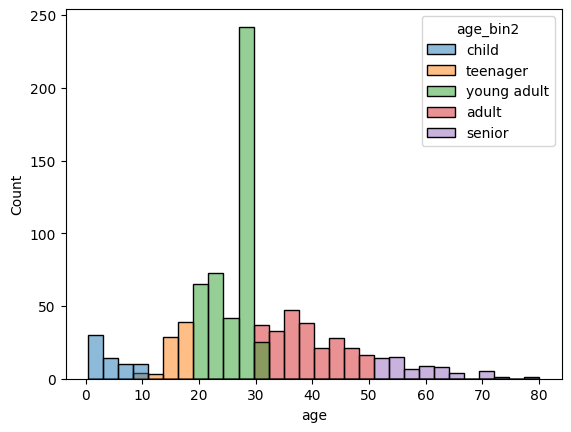

In [20]:
# manual binning using pandas
df['age_bin2'] = pd.cut(df['age'], bins=[0, 10, 18, 30, 50, 80], labels=['child','teenager','young adult', 'adult','senior'])
sns.histplot(df, x='age', hue='age_bin2')